In [196]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Метод наименьших квадратов аппроксимации
функций.

Для той же функции 𝑓(𝑥)  (tg x)  и отрезка [𝑎, 𝑏] написать программу, вычисляющую приближённо аппроксимацию по
набору точек с помощью метода наименьших квадратов с целевым многочленом
степени K.

Построим график заданной функции (tg x) на участке от 0 до 1:

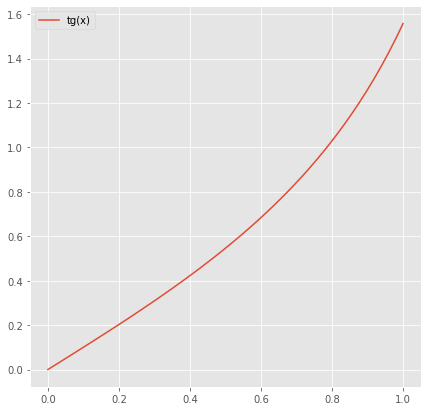

In [338]:
plt.figure(figsize(7, 7))

x = np.linspace(0, 1, 50)
y = np.tan(x)

plt.plot(x, y, label = 'tg(x)')
plt.legend()
plt.show()

Массив опорных точек по которому нужно восстановить функцию:

In [373]:
x = np.array([0, 0.25, 0.5, 0.75, 1])

X  = np.linspace(0, 1, 20)
Y = np.tan(X)

In [374]:
data = pd.DataFrame(columns = ['X', 'Y'],
            data = np.array([X, Y]).T)
# выведем несколько точек
data.head(5)

,X,Y
0,0.000000,0.000000
1,0.052632,0.052680
2,0.105263,0.105654
3,0.157895,0.159220
4,0.210526,0.213693


In [375]:
class MNK:
    
    def __init__(self, fit_intercept = True, up_size = False):
        self.fit_intercept = fit_intercept
        self.up_size = up_size 

    def seek_coef(self, X, y):        
        if self.fit_intercept:
            if self.up_size == True:
                X = np.hstack( (np.ones((X.shape[0], 1)), X.to_numpy().reshape((X.shape[0], 1))) )
            else:
                X = np.hstack( (np.ones((X.shape[0], 1)), X))

        self.a = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
        
    def predict(self, X):
        if self.fit_intercept:
            if self.up_size == True:
                X = np.hstack( (np.ones((X.shape[0], 1)), X.to_numpy().reshape((X.shape[0], 1))) )
            else:
                X = np.hstack( (np.ones((X.shape[0], 1)), X))
        y_pred = X @ self.a
        return y_pred
    
    def get_coef(self):
        return self.a

#### Линейная функция

Коэффициенты при линейной функции:

In [376]:
mnk = MNK(up_size = True)
coef = mnk.seek_coef(data.X, data.Y).get_coef()
print('a0 = %.4f' % coef[0])
print('a1 = %.4f' % coef[1])

a0 = -0.1061
a1 = 1.4609


Построим график исходной функции и линейной функции, полученной МНК:

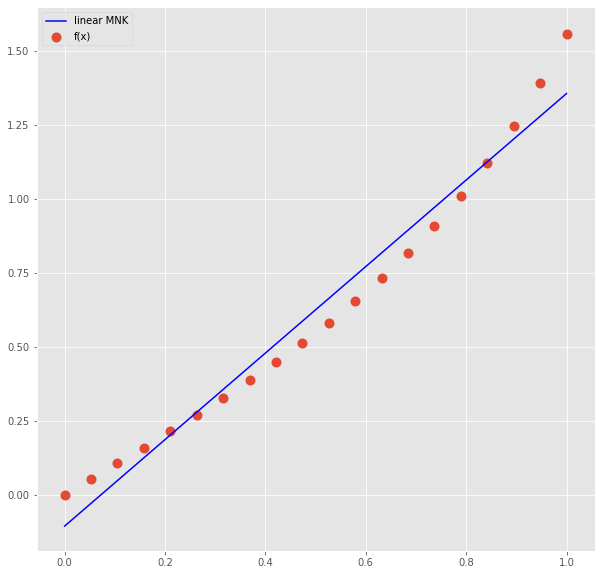

In [377]:
plt.figure(figsize(10, 10))
plt.scatter(data.X, data.Y, label = 'f(x)', linewidths = 4)
plt.plot(X, mnk.predict(data.X), color = 'b', label = 'linear MNK')
plt.legend()
plt.show()

Посмотрим на значения линейной функции, полученной МНК, в точках и на невяки линейной функции:

In [378]:
data['Linear MNK'] = mnk.predict(data.X)
data['residuals of linear'] = [(Y[i] - value)**2 for i, value in enumerate(mnk.predict(data.X))]

In [379]:
data

,X,Y,Linear MNK,residuals of linear
0,0.000000,0.000000,-0.106130,0.011264
1,0.052632,0.052680,-0.029242,0.006711
2,0.105263,0.105654,0.047647,0.003365
3,0.157895,0.159220,0.124536,0.001203
4,0.210526,0.213693,0.201424,0.000151
5,0.263158,0.269406,0.278313,0.000079
6,0.315789,0.326723,0.355202,0.000811
7,0.368421,0.386048,0.432090,0.002120
8,0.421053,0.447836,0.508979,0.003738
9,0.473684,0.512609,0.585867,0.005367


#### Квадратичная функция

In [380]:
data['X^2'] = list(map(lambda x: x**2, data.X))
mnk = MNK()
coef = mnk.seek_coef(data[['X', 'X^2']].to_numpy(), data.Y).get_coef()
print('a0 = %.4f' % coef[0])
print('a1 = %.4f' % coef[1])
print('a2 = %.4f' % coef[2])

a0 = 0.0378
a1 = 0.5496
a2 = 0.9113


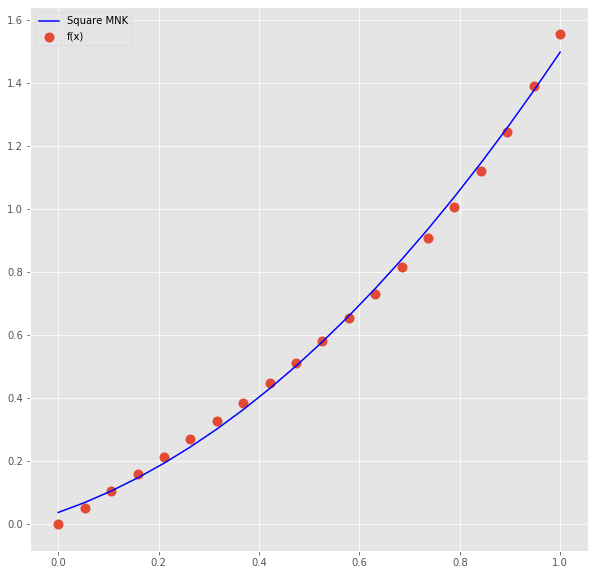

In [381]:
plt.scatter(data.X, data.Y, label = 'f(x)', linewidths = 4)
plt.plot(X, mnk.predict(data[['X', 'X^2']].to_numpy()), color = 'b', label = 'Square MNK')
plt.legend()
plt.show()

In [382]:
data['Square MNK'] =  mnk.predict(data[['X', 'X^2']].to_numpy())
data['residuals of square'] = [(Y[i] - value)**2 for i, value in enumerate(data['Square MNK'])]

In [383]:
data

,X,Y,Linear MNK,residuals of linear,X^2,Square MNK,residuals of square
0,0.000000,0.000000,-0.106130,0.011264,0.000000,0.037759,1.425707e-03
1,0.052632,0.052680,-0.029242,0.006711,0.002770,0.069209,2.731874e-04
2,0.105263,0.105654,0.047647,0.003365,0.011080,0.105707,2.888645e-09
3,0.157895,0.159220,0.124536,0.001203,0.024931,0.147255,1.431648e-04
4,0.210526,0.213693,0.201424,0.000151,0.044321,0.193851,3.936860e-04
5,0.263158,0.269406,0.278313,0.000079,0.069252,0.245496,5.716675e-04
6,0.315789,0.326723,0.355202,0.000811,0.099723,0.302190,6.018709e-04
7,0.368421,0.386048,0.432090,0.002120,0.135734,0.363932,4.890928e-04
8,0.421053,0.447836,0.508979,0.003738,0.177285,0.430724,2.928268e-04
9,0.473684,0.512609,0.585867,0.005367,0.224377,0.502563,1.009231e-04


#### Кубическая функция

In [384]:
data['X^3'] = list(map(lambda x: x**3, data.X))
mnk = MNK()
coef = mnk.seek_coef(data[['X', 'X^2', 'X^3']].to_numpy(), data.Y).get_coef()
print('a0 = %.4f' % coef[0])
print('a1 = %.4f' % coef[1])
print('a2 = %.4f' % coef[2])
print('a3 = %.4f' % coef[3])

a0 = -0.0081
a1 = 1.1829
a2 = -0.7131
a3 = 1.0830


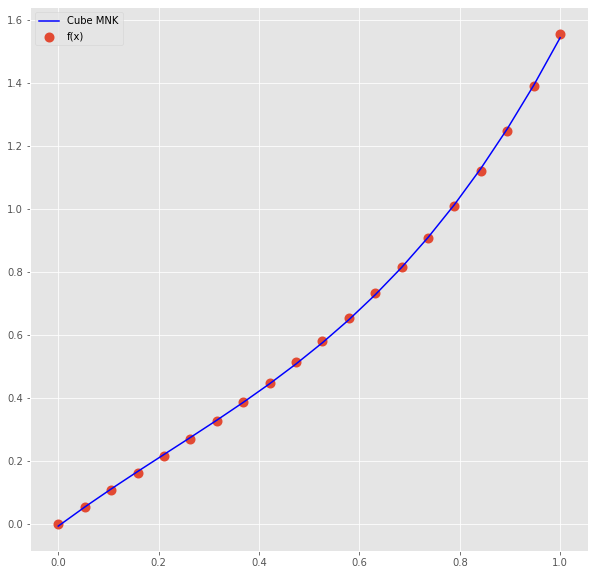

In [385]:
plt.scatter(data.X, data.Y, label = 'f(x)', linewidths = 4)
plt.plot(X, mnk.predict(data[['X', 'X^2', 'X^3']].to_numpy()), color = 'b', label = 'Cube MNK')
plt.legend()
plt.show()

In [386]:
data['Cube MNK'] =  mnk.predict(data[['X', 'X^2', 'X^3']].to_numpy())
data['residuals of cube'] = [(Y[i] - value)**2 for i, value in enumerate(data['Cube MNK'])]

In [387]:
data

,X,Y,Linear MNK,residuals of linear,X^2,Square MNK,residuals of square,X^3,Cube MNK,residuals of cube
0,0.000000,0.000000,-0.106130,0.011264,0.000000,0.037759,1.425707e-03,0.000000,-0.008140,6.625772e-05
1,0.052632,0.052680,-0.029242,0.006711,0.002770,0.069209,2.731874e-04,0.000146,0.052299,1.455893e-07
2,0.105263,0.105654,0.047647,0.003365,0.011080,0.105707,2.888645e-09,0.001166,0.109734,1.664577e-05
3,0.157895,0.159220,0.124536,0.001203,0.024931,0.147255,1.431648e-04,0.003936,0.165112,3.471720e-05
4,0.210526,0.213693,0.201424,0.000151,0.044321,0.193851,3.936860e-04,0.009331,0.219382,3.236673e-05
5,0.263158,0.269406,0.278313,0.000079,0.069252,0.245496,5.716675e-04,0.018224,0.273490,1.668070e-05
6,0.315789,0.326723,0.355202,0.000811,0.099723,0.302190,6.018709e-04,0.031491,0.328384,2.758175e-06
7,0.368421,0.386048,0.432090,0.002120,0.135734,0.363932,4.890928e-04,0.050007,0.385011,1.075831e-06
8,0.421053,0.447836,0.508979,0.003738,0.177285,0.430724,2.928268e-04,0.074646,0.444318,1.237572e-05
9,0.473684,0.512609,0.585867,0.005367,0.224377,0.502563,1.009231e-04,0.106284,0.507253,2.869462e-05


Сумма квадратов невязок для каждого способа:

In [388]:
pd.DataFrame(columns = ['Линейная функция', 'квадратичная функция', 'кубическая функция'], 
             index = ['residuals'], 
             data = np.array([data['residuals of linear'].sum(), data['residuals of square'].sum(), data['residuals of cube'].sum()]).reshape((1, 3)))

,Линейная функция,квадратичная функция,кубическая функция
residuals,0.123536,0.011661,0.000661


#### Вывод:
        С увеличением степени функции, для МНК, уменьшается сумма квадратов 
    невязок. Также увеличивается точность аппроксимации функции, что видно  из графиков.